# **K-Means**

Implementation of the K-MEANS algorithm for classification of database data:
 	
http://archive.ics.uci.edu/ml/   





# Haberman's Survival Data Set

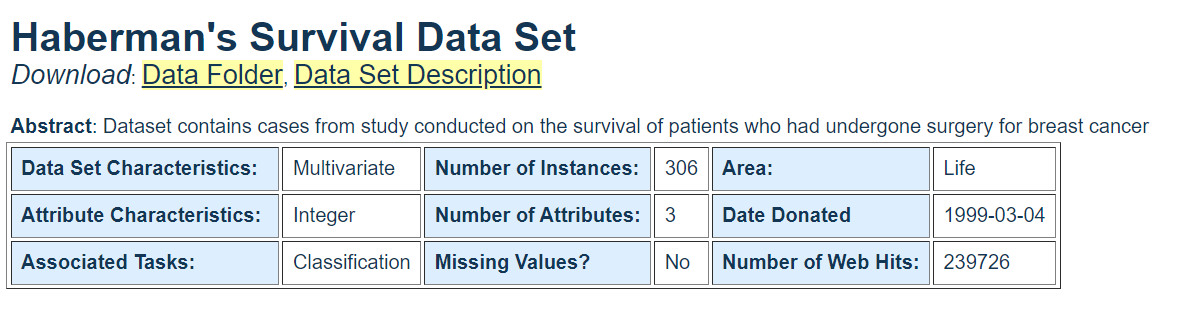

*Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer.*


**Attribute Information:**

0. Age of patient at time of operation (numerical)
1. Patient's year of operation (year - 1900, numerical)
2. Number of positive axillary nodes detected (numerical)
3. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

from: http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

# **Import Libraries**

In [13]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import seaborn as sns
from matplotlib import pyplot as plt

# **Import Dataset**

In [14]:
import pandas as pd
import numpy as np
X= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/haberman.data')
X.rename(columns={"30": 0, "64": 1, "1": 2, "1.1": 3}, inplace=True)
X.describe().round(1)

,0,1,2,3
count,305.0,305.0,305.0,305.0
mean,52.5,62.8,4.0,1.3
std,10.7,3.3,7.2,0.4
min,30.0,58.0,0.0,1.0
25%,44.0,60.0,0.0,1.0
50%,52.0,63.0,1.0,1.0
75%,61.0,66.0,4.0,2.0
max,83.0,69.0,52.0,2.0


# **Escolha dos centroídes:** 

Com base na descrição a cima foi escolhido 3 centroídes, sendo: 

* Centroíde 1: média dos dados (mean);
* Centroíde 2: valores mínimos (min);
* Centroíde 3: valores máximos (max).

In [15]:
centroide = [[52.5,	62.8,	4.0,	1.3],[30.0,	58.0,	0.0,	1.0],
             [83.0,	69.0,	52.0,	2.0]]

# **Distância Euclidiana**

1º passo: Cálculo da distância entre dois pontos

In [16]:
def distancia_euclidiana(X, centroide, numero_centroide):   
    d=[]
    soma=0
    for i in range(len(X)):
        soma=0
        for j in range(len(X.loc[0,:])):
            soma = soma + (X.loc[i,j]-centroide[numero_centroide][j])**2
        d.append(np.sqrt(soma))
    return d

# **Classificação do Centroíde**

2º passo: Distribuição dos pontos nos respectivos centroídes.

O ponto vai pertencer ao centroíde na qual tiver a menor distância.

*d_c1: distância do centroíde 1*

*d_c2: distância do centroíde 2*

*d_c3: distância do centroíde 3*

In [17]:
def class_centroide(d_c1,d_c2,d_c3,d_c4=0):
    v=[]
    if d_c4==0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])):
                v.append('c3')
    if d_c4!=0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])&(d_c1[i]<d_c4[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])&(d_c2[i]<d_c4[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])&(d_c3[i]<d_c4[i])):
                v.append('c3')
            if ((d_c4[i]<d_c1[i])&(d_c4[i]<d_c2[i])&(d_c4[i]<d_c3[i])):
                v.append('c4')            
    return v

 # **Novo Centroíde**

 **3º passo:** O centroíde é movido para a posição média dos seus respectivos pontos. 

In [18]:
def novo_centroide(indices_c):   
    soma=0
    c_novo=[]
    for j in range(X.shape[1]):
        soma=0
        for i in indices_c:
            soma=soma+X.iloc[i,j]
        x_centro=soma/len(indices_c)
        x_centro=round(x_centro,2)
        c_novo.append(x_centro)
    return c_novo

# Iterações

Processo é repetido até que a convergência tenha sido alcançada ou o máx número de iterações

In [19]:
# 1º passo: Cálculo da distância entre ponto e os centroídes
d_c1 = distancia_euclidiana(X, centroide, 0)
d_c2 = distancia_euclidiana(X, centroide, 1)
d_c3 = distancia_euclidiana(X,centroide, 2)

# 2º passo: Distribuição dos pontos nos respectivos centroídes
cluster = class_centroide(d_c1,d_c2,d_c3)
cluster

# 3º passo: O centroíde é movido para a posição média dos seus respectivos pontos. 
indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

centro1=novo_centroide(indices_c1)
centro2=novo_centroide(indices_c2)
centro3=novo_centroide(indices_c3)

centroide2=[centro1,centro2,centro3]

#Processo é repetido até que a convergência dos pontos centrais tenha sido alcançada

iteration= 1
for i in range(250): 
    
    # 1º passo:
    d_c1 = distancia_euclidiana(X, centroide2, 0)   
    d_c2 = distancia_euclidiana(X, centroide2, 1)
    d_c3 = distancia_euclidiana(X, centroide2, 2)

    # 2º passo:
    cluster = class_centroide(d_c1,d_c2,d_c3)

    # 3º passo::
    indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

    centroide=centroide2

    centro1=novo_centroide(indices_c1)
    centro2=novo_centroide(indices_c2)
    centro3=novo_centroide(indices_c3)

    centroide2 =[centro1,centro2,centro3]
    iteration=iteration+1
    
print('Centroides:')
for i in centroide2:
    print(i, '\n')
print('Números de Iterações:',iteration,'\n')

Centroides:
[62.67, 63.15, 1.89, 1.23] 

[44.4, 62.57, 2.38, 1.23] 

[51.79, 63.07, 21.93, 1.62] 

Números de Iterações: 251 



 # **Gráfico**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


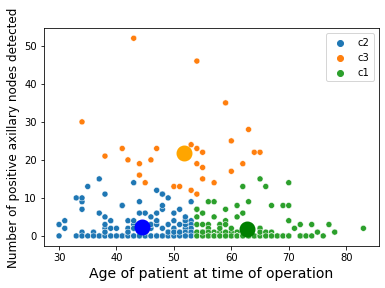

In [27]:
# "Age of patient at time of operation": coluna 0 x "Number of positive axillary nodes detected": coluna 2
plt.xlabel("Age of patient at time of operation", fontsize=14)
plt.ylabel("Number of positive axillary nodes detected", fontsize=12)
sns.scatterplot(X.loc[:,0],X.loc[:,2],hue=cluster)

#Plot centers
plt.scatter(centroide2[0][0],centroide2[0][2],  marker="o", color= 'green', s=120, linewidths=5)
plt.scatter(centroide2[1][0],centroide2[1][2], marker="o", color= 'blue', s=120, linewidths=5)
plt.scatter(centroide2[2][0],centroide2[2][2], marker="o", color= 'orange', s=120, linewidths=5);